## Refer SKlearn official Documnetation if yor are sure about syntax or parameter

https://scikit-learn.org/stable/index.html

In [2]:
#Import necessary Libraries
import numpy as np
import pandas as pd

#For data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [5]:
#Import Dataset
data=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.shape

(768, 9)

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Let's check distribution

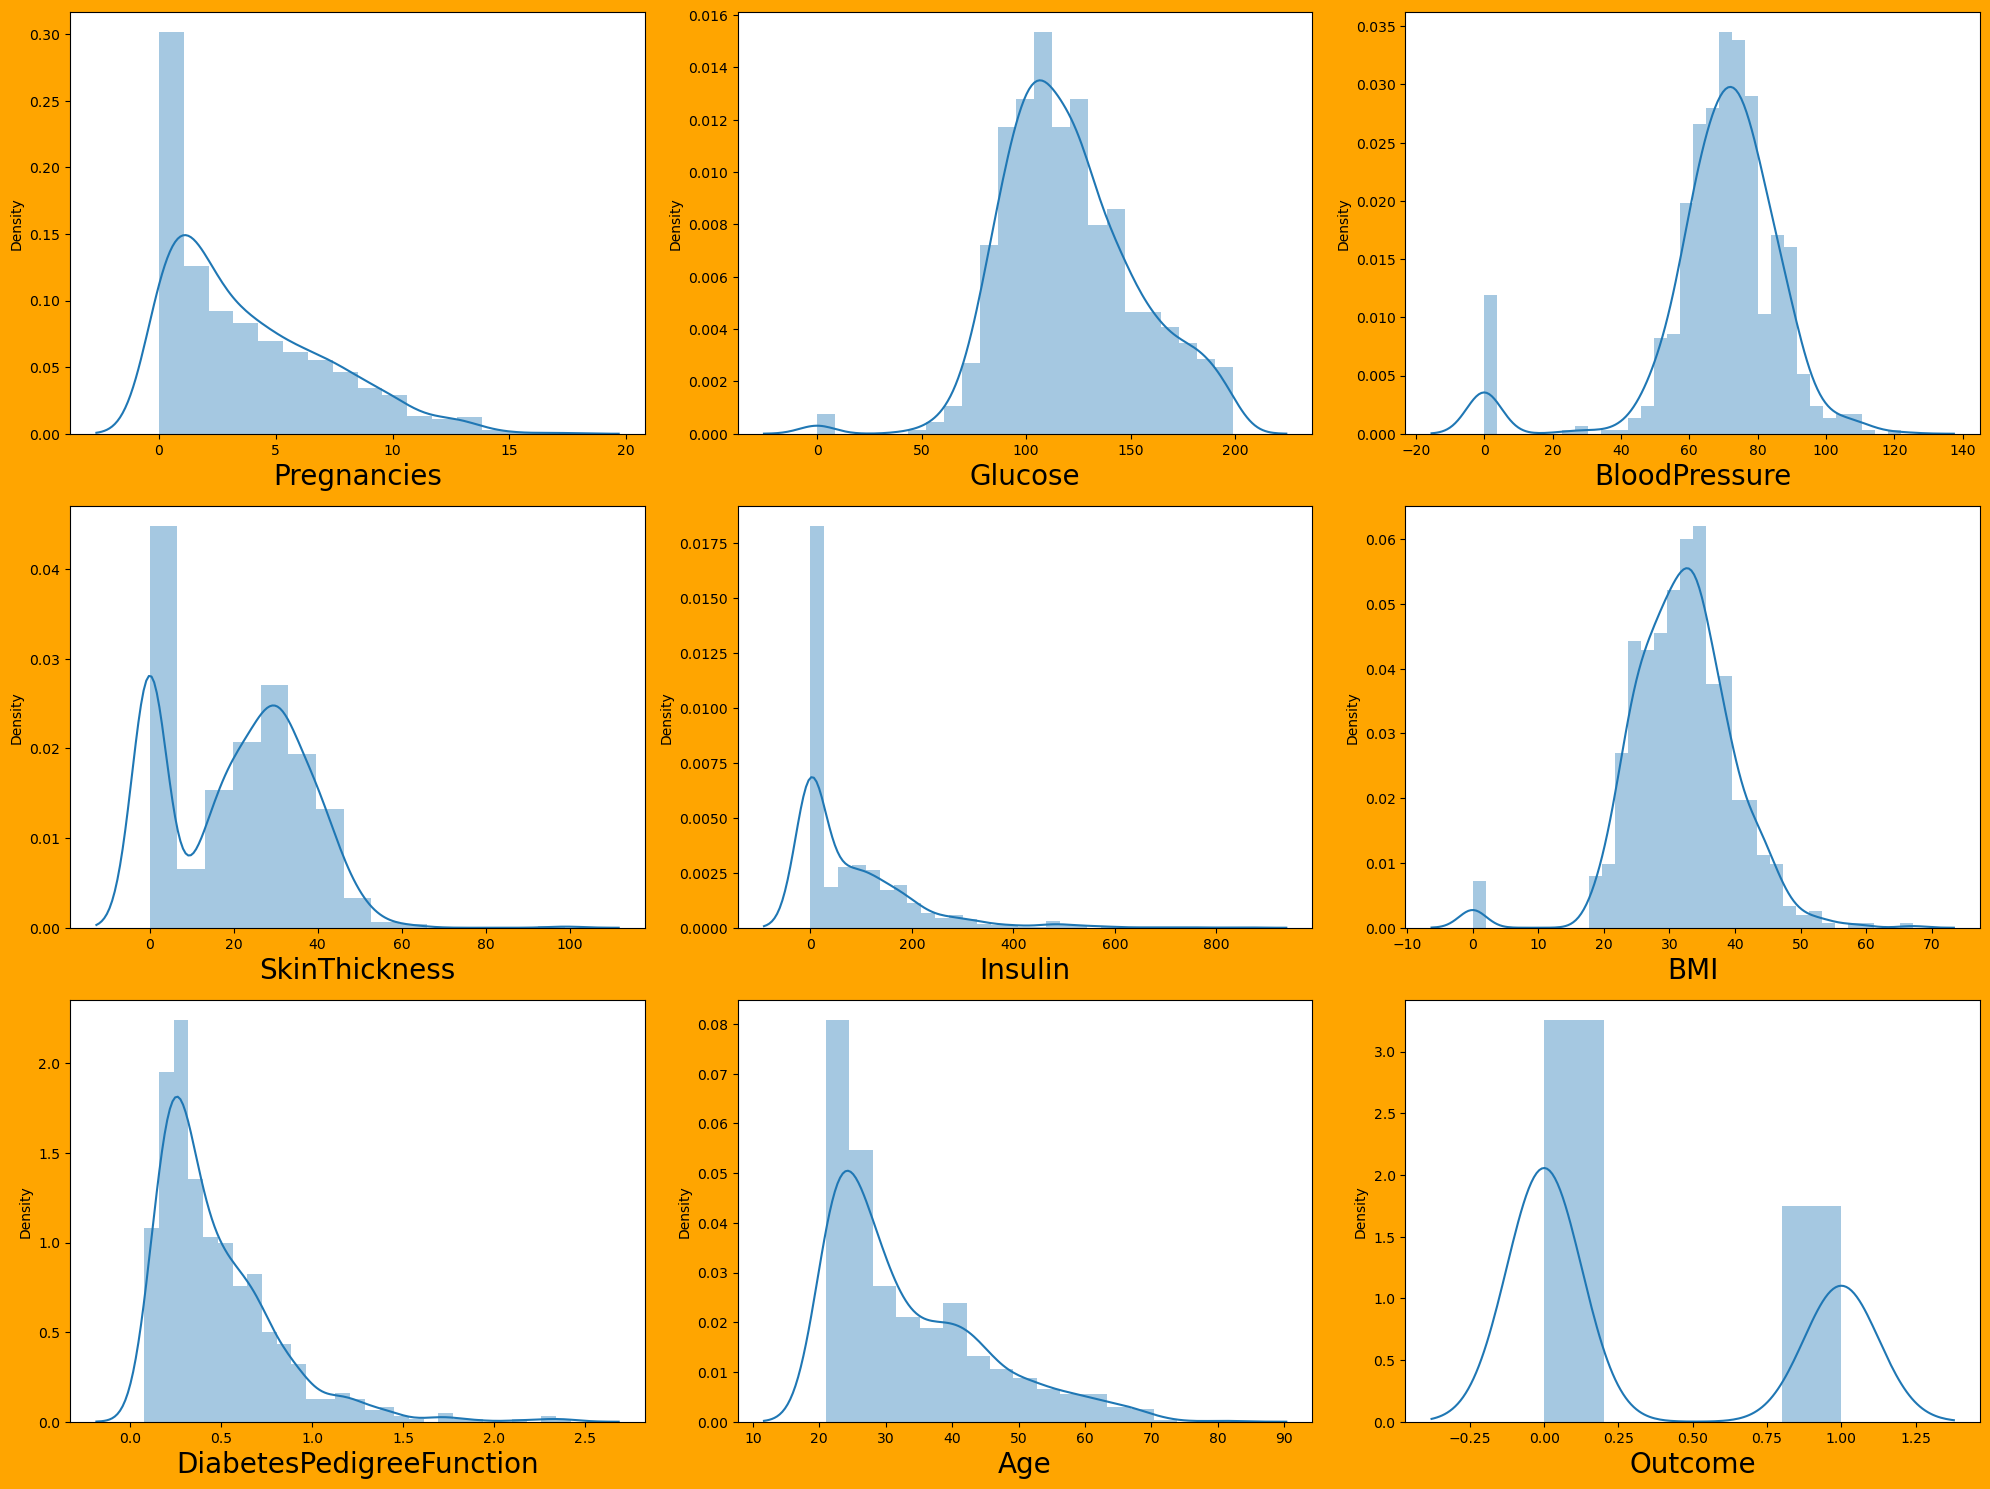

In [12]:
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

## There is 0 values in this feature(Glucose, BloodPressure,	SkinThickness,	Insulin	     BMI), we need to remove that.

In [13]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

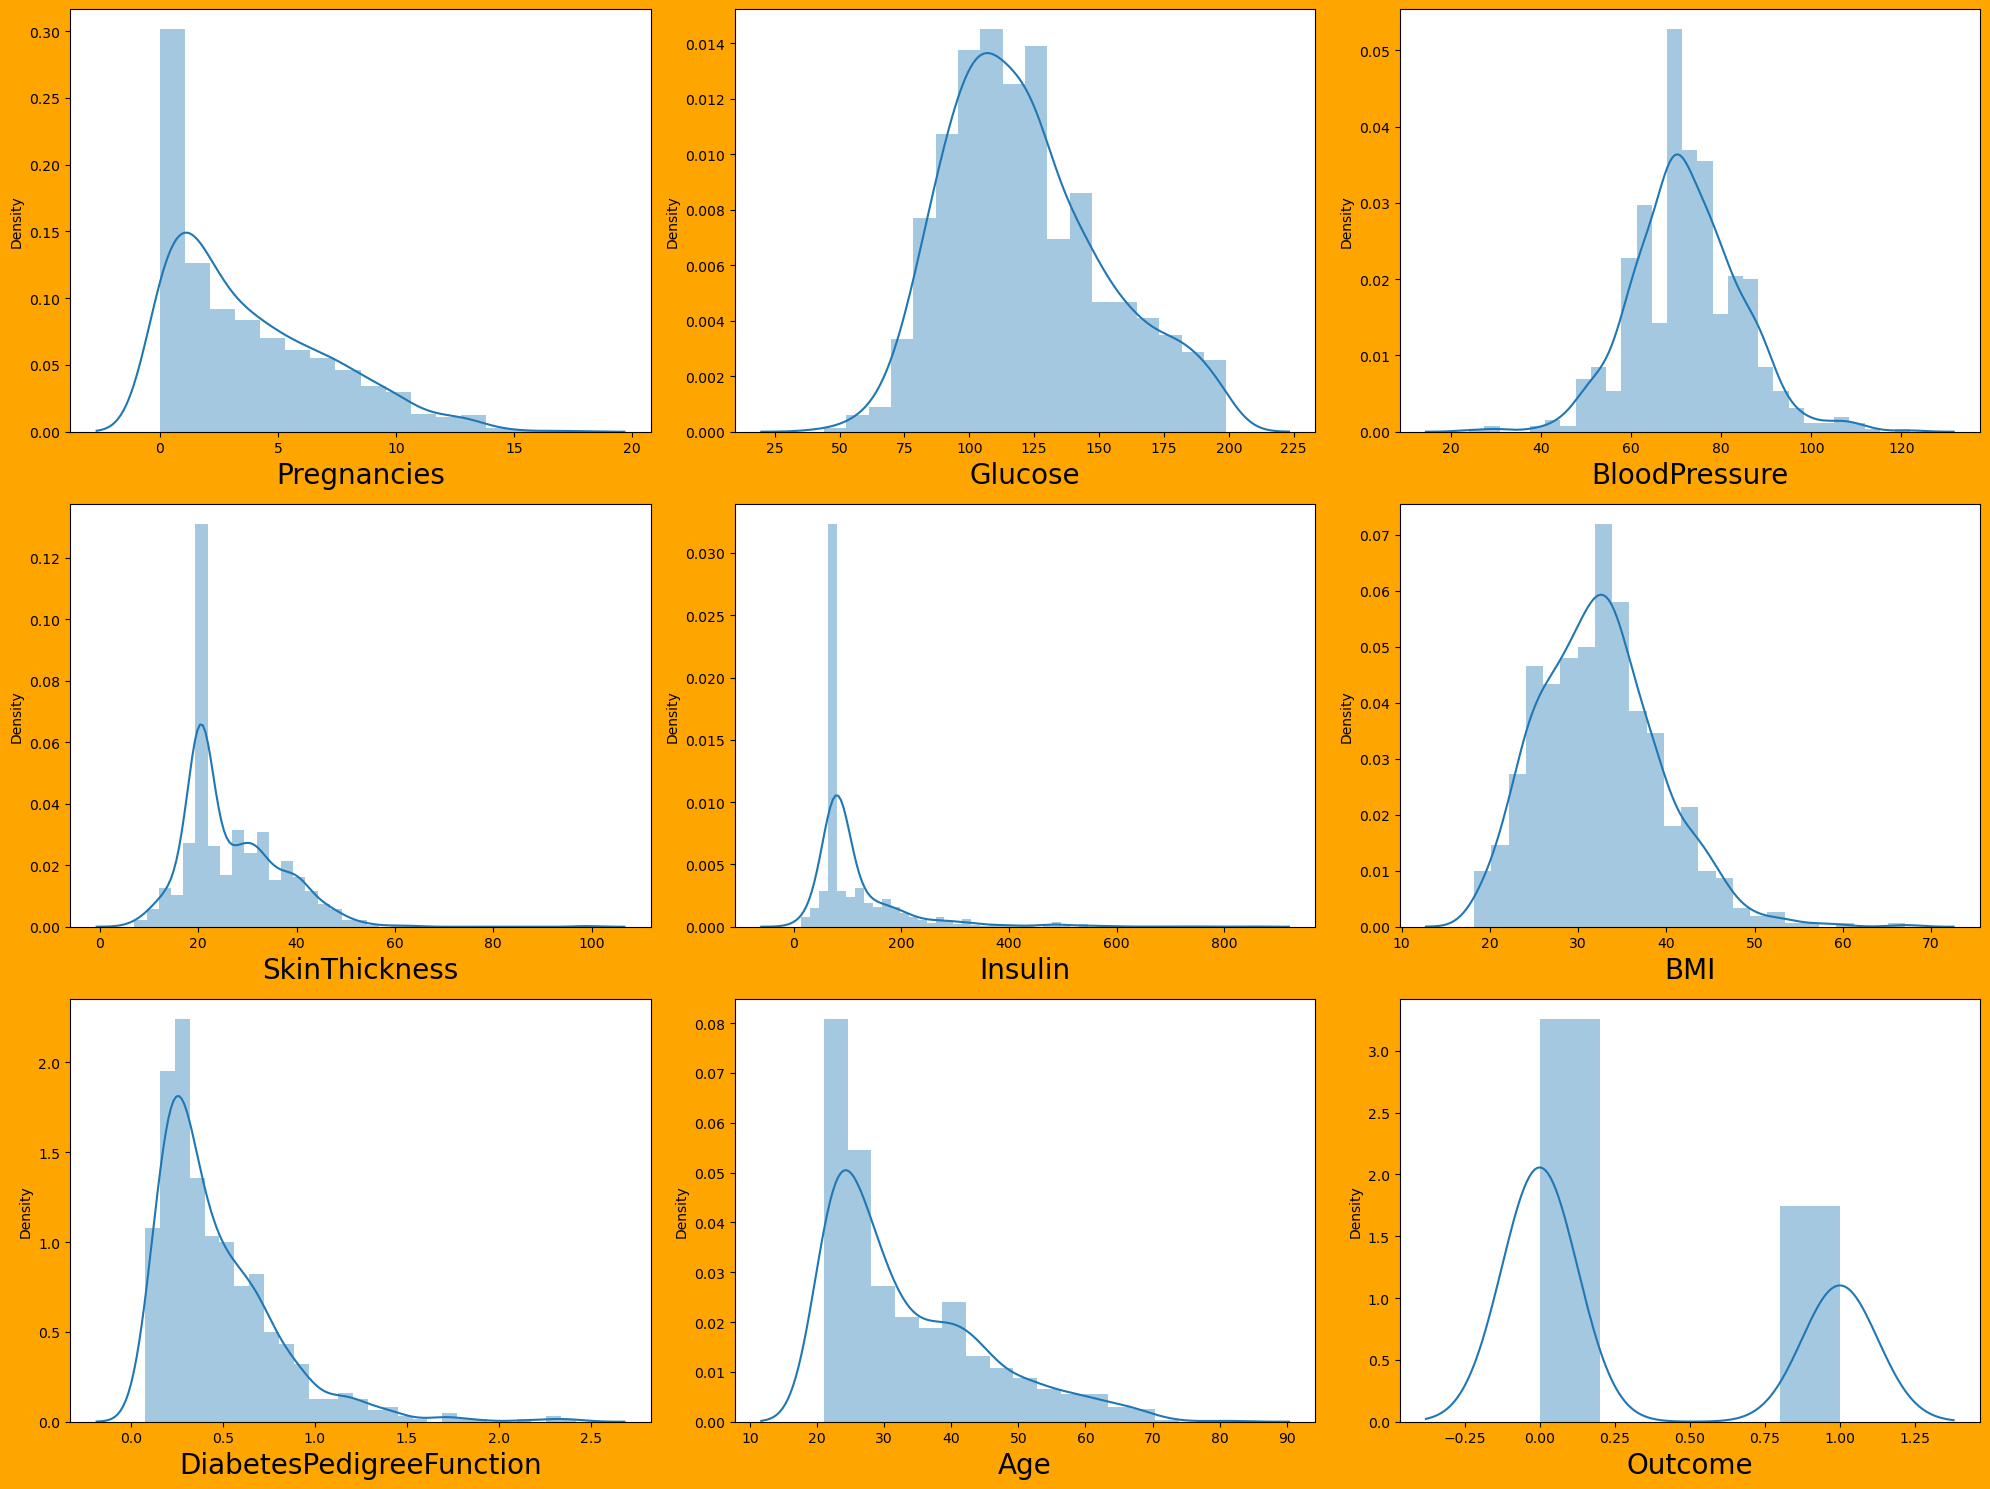

In [14]:
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

# Check for outliers

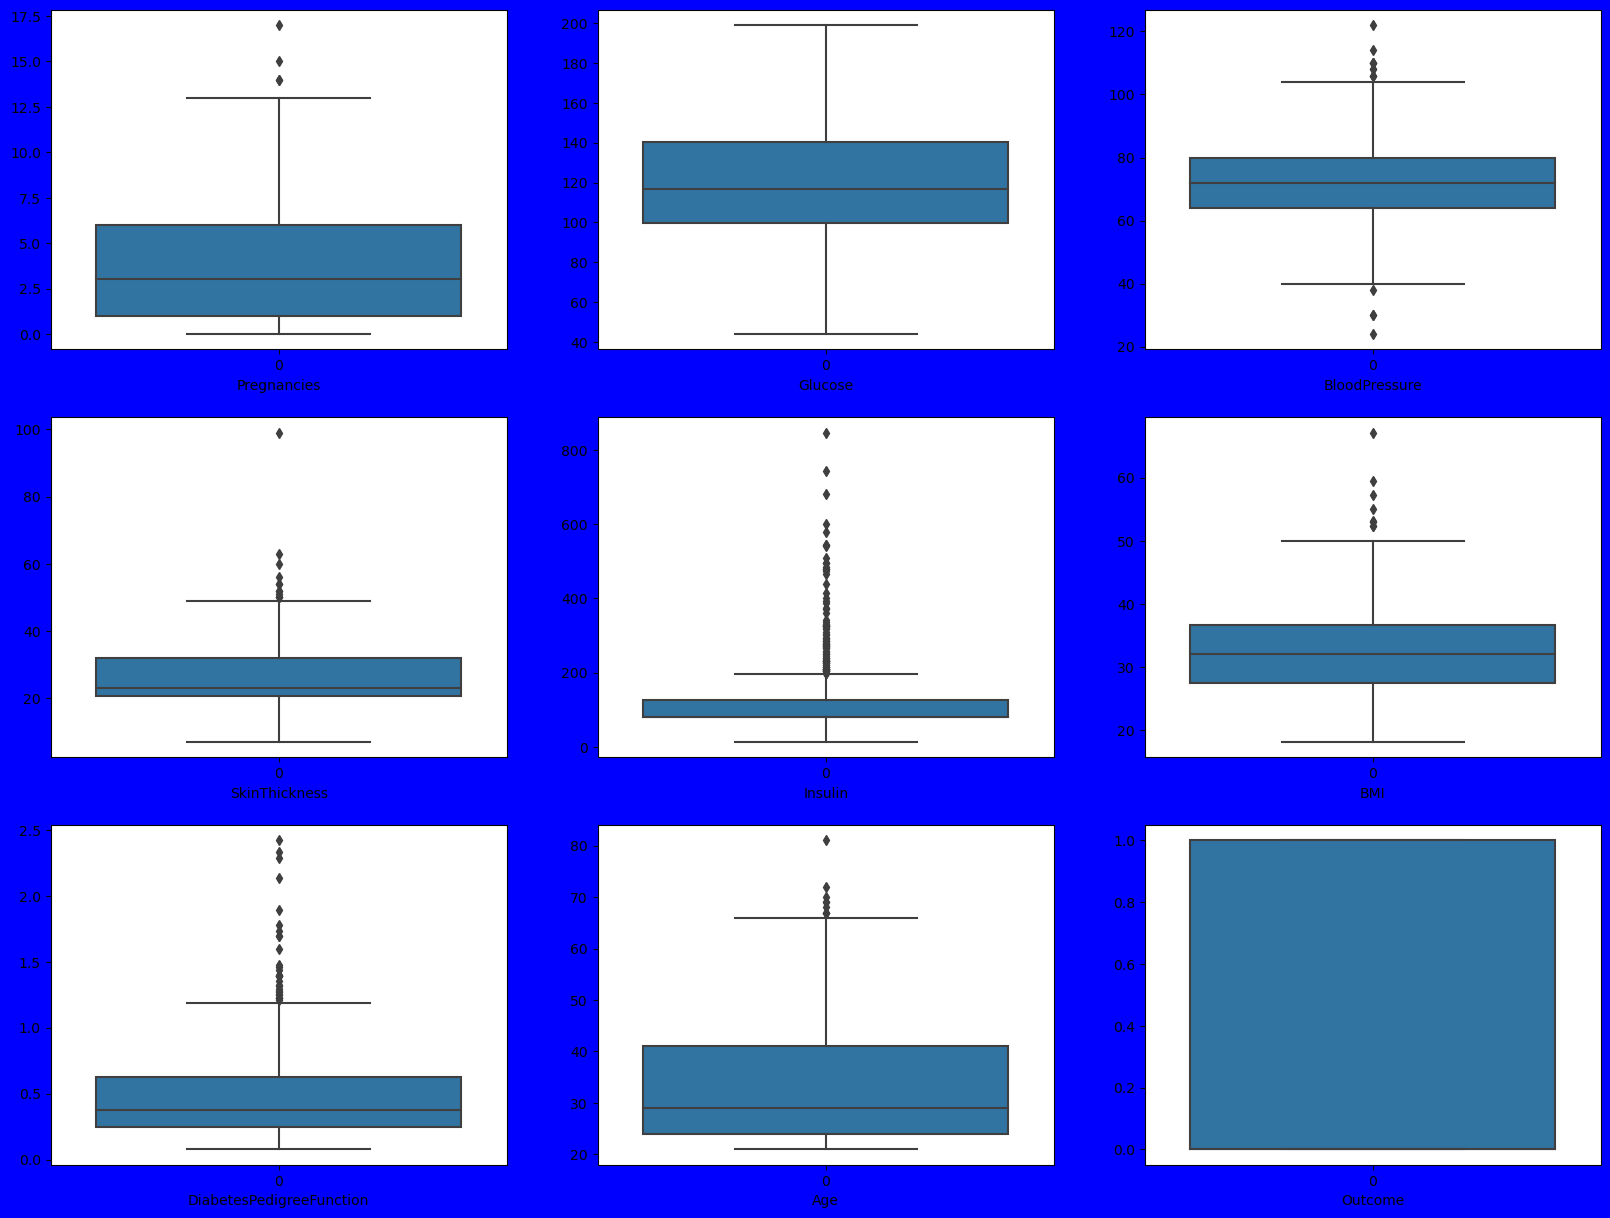

In [15]:
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber=1
for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column)
    plotnumber +=1
plt.show()

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Let's handle outliers

In [17]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [18]:
print(q1)
print(q3)
print(iqr)

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64
Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382

In [19]:
#Pregnancies
preg=q3.Pregnancies +(1.5*iqr.Pregnancies)
index=np.where(data['Pregnancies'] > preg)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(764, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
#BloodPressure
bp=q3.BloodPressure +(1.5*iqr.BloodPressure)
index=np.where(data['BloodPressure']>bp)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
#SkinThickness
sk=q3.SkinThickness +(1.5 * iqr.SkinThickness)
index=np.where(data['SkinThickness']>sk)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
#Insulin
ins=iqr.Insulin + (1.5*iqr.Insulin)
index=np.where(data['Insulin']>ins)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(538, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
533,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
534,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
535,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
536,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
#BMI
bm=q3.BMI * (1.5 + iqr.BMI)
index=np.where(data['BMI']>bm)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(538, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
533,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
534,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
535,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
536,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [24]:
#DiabetesPedigreeFunction
dbs=q3.DiabetesPedigreeFunction + (1.5 *iqr.DiabetesPedigreeFunction)
index=np.where(data['DiabetesPedigreeFunction']>dbs)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(521, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
516,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
517,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
518,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
519,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [25]:
x=data.drop(columns=['Outcome'])
y=data.Outcome

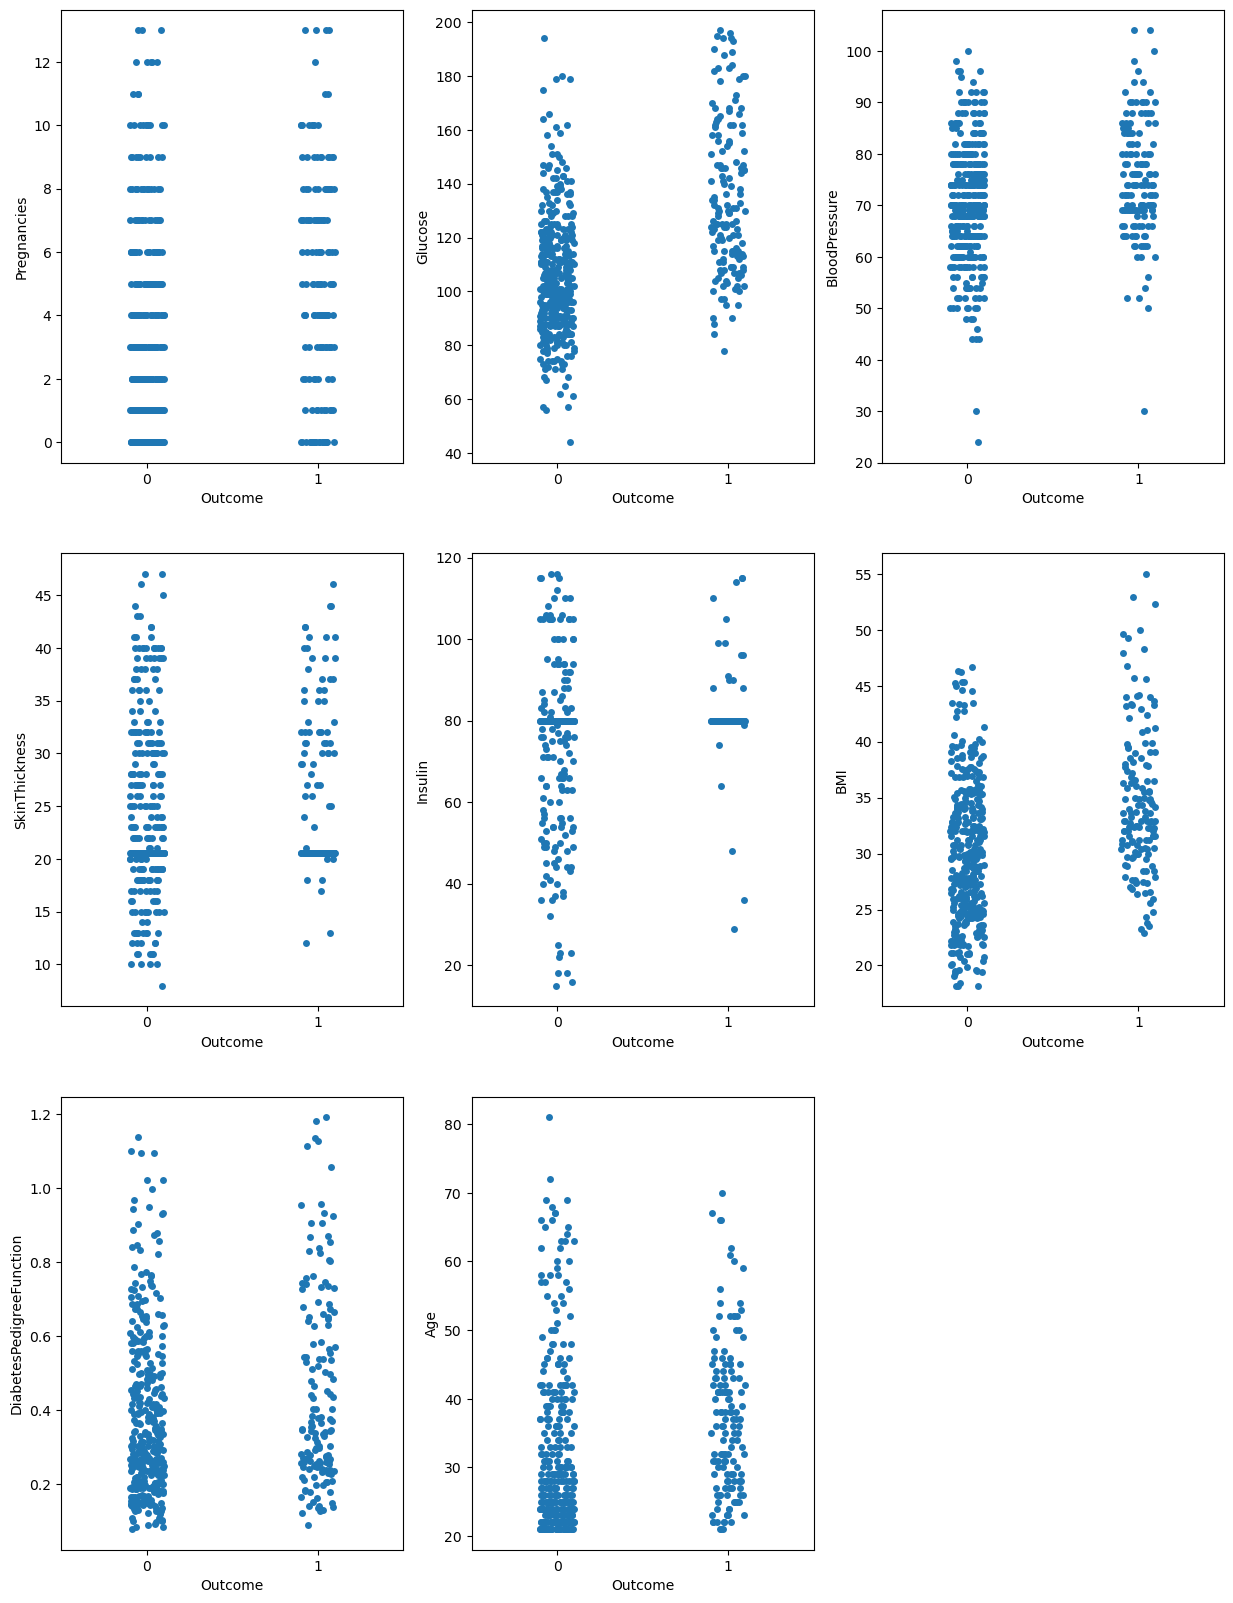

In [26]:
#Lets see how feature are related to class
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column])
    plotnumber +=1
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

# Let's Standardize the data

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [29]:
scaler=StandardScaler()

In [30]:
x_scaler=scaler.fit_transform(x)

In [31]:
x_scaler

array([[ 0.66617771,  1.22055094,  0.03452267, ...,  0.3550628 ,
         0.95968727,  1.41279969],
       [-0.87639379, -1.05073524, -0.49628558, ..., -0.71213807,
        -0.20917334, -0.17032281],
       [ 1.28320631,  2.48237659, -0.67322167, ..., -1.21524705,
         1.15026237, -0.08700057],
       ...,
       [ 0.35766341,  0.24714257,  0.03452267, ..., -0.77312098,
        -0.65808358, -0.25364504],
       [-0.87639379,  0.42740338, -1.02709384, ..., -0.17853764,
        -0.21764335,  1.16283298],
       [-0.87639379, -0.76231795, -0.14241341, ..., -0.13280046,
        -0.36163342, -0.8369007 ]])

# Let's check VIF

In [32]:
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['features']=x.columns
vif

,Score,features
0,1.347414,Pregnancies
1,1.216995,Glucose
2,1.245425,BloodPressure
3,1.306078,SkinThickness
4,1.051740,Insulin
5,1.401577,BMI
6,1.020218,DiabetesPedigreeFunction
7,1.541286,Age


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.30,random_state=255)

In [39]:
lr=LogisticRegression()

In [40]:
lr.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred=lr.predict(x_test)

In [42]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.802547770700637


# Let's Check Metrices

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       111
           1       0.73      0.52      0.61        46

    accuracy                           0.80       157
   macro avg       0.77      0.72      0.74       157
weighted avg       0.79      0.80      0.79       157



In [45]:
#Roc Curve
fpr,tpr,threshold =roc_curve(y_test,y_pred)

In [46]:
#threshold[0] means no instances predicted (It should be read from 0 - MAX)
print('Threshold = ',threshold)
print('True Positive Rate = ',tpr)
print('False Positive Rate = ',fpr)

Threshold =  [inf  1.  0.]
True Positive Rate =  [0.         0.52173913 1.        ]
False Positive Rate =  [0.         0.08108108 1.        ]


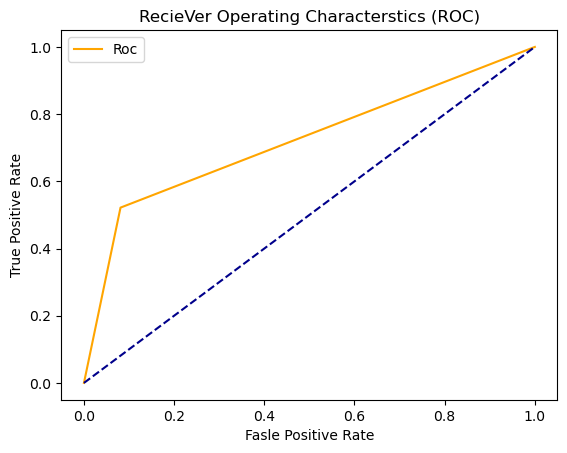

In [47]:
plt.plot(fpr,tpr,color='orange',label='Roc')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RecieVer Operating Characterstics (ROC)')
plt.legend()
plt.show()

In [48]:
#How Much area it is covering
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.7203290246768507